In [4]:
cd drive/My\ Drive/ML_hw

/content/drive/My Drive/ML_hw


In [5]:
pwd

'/content/drive/My Drive/ML_hw'

In [98]:
import numpy as np
import pandas as pd
import copy
import random
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD,Adam

np.random.seed(0)

In [63]:
df = pd.read_csv('forestfires.csv')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [64]:
mon = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df = df.drop(['day'],axis=1)
for i, m in enumerate(mon):
  df = df.replace(m, i)
df = df.apply(pd.to_numeric, errors='ignore')
df = (df - df.mean()) / (df.std()) 

In [65]:
df

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1.007337,0.569309,-1.966538,-0.805180,-1.322045,-1.828706,-0.860113,-1.840857,0.411326,1.497164,-0.073197,-0.201824
1,1.007337,-0.243765,1.109046,-0.008094,-1.178399,0.488418,-0.509195,-0.153130,-0.691786,-1.740070,-0.073197,-0.201824
2,1.007337,-0.243765,1.109046,-0.008094,-1.048806,0.560173,-0.509195,-0.738668,-0.691786,-1.516813,-0.073197,-0.201824
3,1.439531,1.382383,-1.966538,0.191177,-1.211188,-1.896429,-0.004751,-1.823636,3.230391,-0.009824,0.602572,-0.201824
4,1.439531,1.382383,-1.966538,-0.243597,-0.930142,-1.796859,0.126843,-1.289763,3.352959,-1.237741,-0.073197,-0.201824
...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.289244,-1.056839,0.230308,-1.638496,-0.845829,0.474309,-1.561947,1.534597,-0.753070,-0.735411,-0.073197,-0.100655
513,-1.153631,-0.243765,0.230308,-1.638496,-0.845829,0.474309,-1.561947,0.518517,1.637006,0.994835,-0.073197,0.651044
514,1.007337,-0.243765,0.230308,-1.638496,-0.845829,0.474309,-1.561947,0.397965,1.575722,1.497164,-0.073197,-0.026506
515,-1.585825,-0.243765,0.230308,0.680298,0.548471,0.269122,0.499693,1.155720,-0.140230,-0.009824,-0.073197,-0.201824


In [66]:
data = np.array(df, dtype=np.float64)

In [67]:
data

array([[ 1.00733714,  0.56930904, -1.96653837, ...,  1.49716438,
        -0.07319742, -0.20182432],
       [ 1.00733714, -0.24376492,  1.10904606, ..., -1.74007034,
        -0.07319742, -0.20182432],
       [ 1.00733714, -0.24376492,  1.10904606, ..., -1.51681277,
        -0.07319742, -0.20182432],
       ...,
       [ 1.00733714, -0.24376492,  0.23030765, ...,  1.49716438,
        -0.07319742, -0.02650649],
       [-1.58582453, -0.24376492,  0.23030765, ..., -0.0098242 ,
        -0.07319742, -0.20182432],
       [ 0.57514353, -1.05683889,  1.54841526, ...,  0.26924776,
        -0.07319742, -0.20182432]])

In [133]:
model = Sequential()

model.add(Dense(256, input_dim=x.shape[1], activation='tanh'))
model.add(Dense(256, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(1, activation='tanh'))
 
sgd = SGD(lr=0.001, decay=1e-6)
model.compile(loss='mse', optimizer=sgd)
print(model.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 256)               3072      
_________________________________________________________________
dense_70 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_71 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 129       
Total params: 101,889
Trainable params: 101,889
Non-trainable params: 0
_________________________________________________________________
None


Train on 103 samples, validate on 414 samples
Epoch 1/100
103/103 [==============================] - 0s 881us/step - loss: 0.1051 - val_loss: 0.1203
Epoch 2/100
103/103 [==============================] - 0s 376us/step - loss: 0.0687 - val_loss: 0.0836
Epoch 3/100
103/103 [==============================] - 0s 378us/step - loss: 0.0465 - val_loss: 0.0552
Epoch 4/100
103/103 [==============================] - 0s 459us/step - loss: 0.0305 - val_loss: 0.0365
Epoch 5/100
103/103 [==============================] - 0s 380us/step - loss: 0.0195 - val_loss: 0.0229
Epoch 6/100
103/103 [==============================] - 0s 431us/step - loss: 0.0118 - val_loss: 0.0145
Epoch 7/100
103/103 [==============================] - 0s 400us/step - loss: 0.0072 - val_loss: 0.0102
Epoch 8/100
103/103 [==============================] - 0s 400us/step - loss: 0.0047 - val_loss: 0.0073
Epoch 9/100
103/103 [==============================] - 0s 377us/step - loss: 0.0031 - val_loss: 0.0054
Epoch 10/100
103/103 [=====

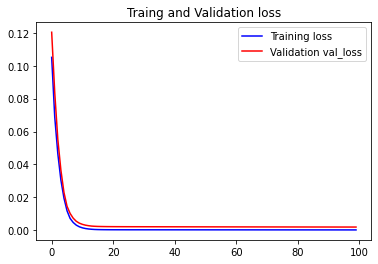

In [134]:
random.shuffle(data)
x, y = data[:, :-1], data[:, -1].reshape((data.shape[0], 1))

history = model.fit(x, y, validation_split=0.8, epochs=100, batch_size=16)

epochs=range(len(history.history['loss']))

plt.figure()
plt.plot(epochs,history.history['loss'],'b',label='Training loss')
plt.plot(epochs,history.history['val_loss'],'r',label='Validation val_loss')
plt.title('Traing and Validation loss')
plt.legend()
plt.savefig('4_2.svg')